In [122]:
# I) importing libraries 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from mlxtend.preprocessing import TransactionEncoder
from sklearn import preprocessing


import tensorflow as tf 
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

import pickle

In [7]:
# II) importing the datasets 
#1) training dataset 
training=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/iris_train.csv')
#2) testing dataset 
testing=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/iris_test.csv')
training

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,4.7,3.2,1.3,0.2,setosa
1,5.0,3.6,1.4,0.2,setosa
2,5.4,3.9,1.7,0.4,setosa
3,4.6,3.4,1.4,0.3,setosa
4,4.9,3.1,1.5,0.1,setosa
...,...,...,...,...,...
100,6.7,3.3,5.7,2.5,virginica
101,6.7,3.0,5.2,2.3,virginica
102,6.5,3.0,5.2,2.0,virginica
103,6.2,3.4,5.4,2.3,virginica


In [5]:
# III) data preprocessing 
#1)verifying if there are missing data
#a) training dataset 
training.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [18]:
#after checking we can see that there is no missing data in the trainingset
#b) training dataset 
testing.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [23]:
#after checking we can see that there is no missing data in the testingset
#since there is no missing data we won't have to fill any missing thing
#3) data intigration 
training[['Species','Petal.Width']].groupby('Petal.Width').count()

,Species
Petal.Width,
0.1,4
0.2,18
0.3,5
0.4,7
0.5,1
1.0,4
1.1,3
1.2,4
1.3,11


Text(0.5, 0, 'Petal.Width')

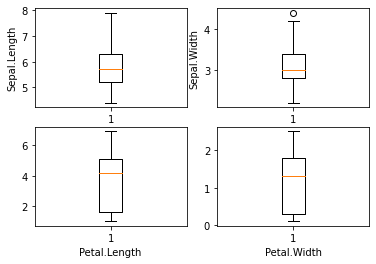

In [31]:
#the flowers that have 0.1 as Petal.Width are 4 from the table so the rest can be read by readers
#4) plotings 
#a) boxplots
plt.subplot(2,2,1)
plt.boxplot(training['Sepal.Length'])
plt.ylabel('Sepal.Length')
plt.subplot(2,2,2)
plt.boxplot(training['Sepal.Width'])
plt.ylabel('Sepal.Width')
plt.subplot(2,2,3)
plt.boxplot(training['Petal.Length'])
plt.xlabel('Petal.Length')
plt.subplot(2,2,4)
plt.boxplot(training['Petal.Width'])
plt.xlabel('Petal.Width')

Text(0.5, 0, 'Petal.Width')

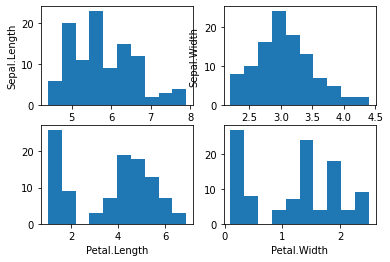

In [32]:
#we can read all the maxs and mins the medians  the 25% and 75 % quartiles on the boxplots 
#a) histograms
plt.subplot(2,2,1)
plt.hist(training['Sepal.Length'])
plt.ylabel('Sepal.Length')
plt.subplot(2,2,2)
plt.hist(training['Sepal.Width'])
plt.ylabel('Sepal.Width')
plt.subplot(2,2,3)
plt.hist(training['Petal.Length'])
plt.xlabel('Petal.Length')
plt.subplot(2,2,4)
plt.hist(training['Petal.Width'])
plt.xlabel('Petal.Width')

Text(0, 0.5, 'Petal.Width')

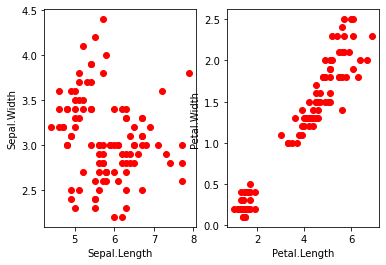

In [39]:
#readers can read on the histograms to make some analysis 
#c) scatters plots to see  if there is relations between those variables 
plt.subplot(1,2,1)
plt.scatter(training['Sepal.Length'],training['Sepal.Width'],color='r')
plt.xlabel('Sepal.Length')
plt.ylabel('Sepal.Width')
plt.subplot(1,2,2)
plt.scatter(training['Petal.Length'],training['Petal.Width'],color='r')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')

In [44]:
#in this case there is no relation between the Sepal.Length and the Sepal.Width
#in this case the Petal.Length and the Petal.Width are positivly correlated 
#5) data transformation 
le = preprocessing.LabelEncoder()
varnames=[training["Species"]]
classeattri=[]
numberattri=[]
for var in varnames:
    le.fit(var)
    classeattri.append(le.classes_)
    numberattri.append(le.transform(le.classes_))
print(classeattri)
print(numberattri)

[array(['setosa', 'versicolor', 'virginica'], dtype=object)]
[array([0, 1, 2])]


In [45]:
#setosa=0,versicolor=1,virginica=2
#lets now transform the traning and dataset 
#transformation the whole table into int instead of str
for i in training.columns:
    if isinstance(training[i][0], str):
            training[i] = le.fit_transform(training[i])
for i in testing.columns:
    if isinstance(testing[i][0], str):
            testing[i] = le.fit_transform(testing[i])           

In [46]:
training

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,4.7,3.2,1.3,0.2,0
1,5.0,3.6,1.4,0.2,0
2,5.4,3.9,1.7,0.4,0
3,4.6,3.4,1.4,0.3,0
4,4.9,3.1,1.5,0.1,0
...,...,...,...,...,...
100,6.7,3.3,5.7,2.5,2
101,6.7,3.0,5.2,2.3,2
102,6.5,3.0,5.2,2.0,2
103,6.2,3.4,5.4,2.3,2


In [53]:
#lets now transform the datasets into numpy arrays 
mytrain=np.array(training)
mytest=np.array(testing)

In [56]:
mytrain

array([[4.7, 3.2, 1.3, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.6, 0.2, 0. ],
       [5.4, 3.4, 1.5, 0.4, 0. ],
       [5.2, 4.1, 1.5, 0.1, 0. ],
       [5.5, 4.2, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.2, 1.2, 0.2, 0. ],
       [4.9, 3.6, 1.4, 0.1, 0. ],
       [5. , 3.5, 1.3, 0.3, 0. ],
       [4.4, 3

In [87]:
#because we are going to use tensorflow that understands only numbers 
# in this study we dont have to scale the data 
#IV) model creation 
#1) lets split the data into xtrain,ytrain,xtest,ytest.
#a) for xtrain and ytrain 
xtrain=mytrain[:,0:4].astype(float)
ytrain=mytrain[:,4]

In [88]:
xtrain

array([[4.7, 3.2, 1.3, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [4.9, 3.6, 1.4, 0.1],
       [5. , 3.5, 1.3, 0.3],
       [4.4, 3.2, 1.3, 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [4.8, 3. , 1.4, 0.3],
       [4.6, 3.2, 1.4, 0.2],
       [5.3, 3.7, 1.5, 0.2],
       [5. , 3

In [89]:
ytaing

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2.])

In [90]:
#b) for xtest and ytest
xtest=mytest[:,0:4].astype(float)
ytest=mytest[:,4]

In [91]:
xtest

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [5. , 3. , 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [4.4, 3. , 1.3, 0.2],
       [5.1, 3.4, 1.5, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 3.8, 1.6, 0.2],
       [7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5. , 2. , 3.5, 1. ],
       [6. , 2.2, 4. , 1. ],
       [6.1, 2.9, 4.7, 1.4],
       [5.8, 2.7, 4.1, 1. ],
       [5.9, 3.2, 4.8, 1.8],
       [6.1, 2.8, 4. , 1.3],
       [6.1, 2.8, 4.7, 1.2],
       [6.6, 3. , 4.4, 1.4],
       [6.8, 2.8, 4.8, 1.4],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.9, 4.5, 1.5],
       [5.5, 2.5, 4. , 1.3],
       [6.5, 3. , 5.8, 2.2],
       [7.6, 3. , 6.6, 2.1],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 2.5, 5. , 2. ],
       [5.8, 2

In [66]:
ytest

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [113]:
#2)model
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(4,)), #input layer with 4 input
                                   tf.keras.layers.Dense(100,activation='relu'), # 1th idden layers with 100 neurals 
                                   tf.keras.layers.Dense(100,activation='relu'),# 2th idden layers with 100 neurals
                                 tf.keras.layers.Dense(100,activation='relu'),# 3th idden layers with 100 neurals
                                  tf.keras.layers.Dense(100,activation='relu'),# 4th idden layers with 100 neurals
                                 tf.keras.layers.Dense(3,activation='softmax'),])# output layers with 3 neurals

In [114]:
#3) compile the model 
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics="accuracy")

In [115]:
#4) fitting the model
model.fit(xtrain,ytrain,epochs=100,batch_size=2)

Epoch 1/100
53/53 [==============================] - 0s 1ms/step - loss: 0.8905 - accuracy: 0.6476
Epoch 2/100
53/53 [==============================] - 0s 1ms/step - loss: 0.6242 - accuracy: 0.7143
Epoch 3/100
53/53 [==============================] - 0s 1ms/step - loss: 0.4935 - accuracy: 0.7429
Epoch 4/100
53/53 [==============================] - 0s 1ms/step - loss: 0.4453 - accuracy: 0.7905
Epoch 5/100
53/53 [==============================] - 0s 1ms/step - loss: 0.4351 - accuracy: 0.7714
Epoch 6/100
53/53 [==============================] - 0s 1ms/step - loss: 0.3964 - accuracy: 0.8190
Epoch 7/100
53/53 [==============================] - 0s 1ms/step - loss: 0.3410 - accuracy: 0.8667
Epoch 8/100
53/53 [==============================] - 0s 1ms/step - loss: 0.3358 - accuracy: 0.8190
Epoch 9/100
53/53 [==============================] - 0s 1ms/step - loss: 0.3486 - accuracy: 0.8571
Epoch 10/100
53/53 [==============================] - 0s 1ms/step - loss: 0.3052 - accuracy: 0.8762
Epoch 11/

53/53 [==============================] - 0s 1ms/step - loss: 0.1091 - accuracy: 0.9429
Epoch 84/100
53/53 [==============================] - 0s 1ms/step - loss: 0.1615 - accuracy: 0.9429
Epoch 85/100
53/53 [==============================] - 0s 1ms/step - loss: 0.1213 - accuracy: 0.9429
Epoch 86/100
53/53 [==============================] - 0s 1ms/step - loss: 0.0987 - accuracy: 0.9619
Epoch 87/100
53/53 [==============================] - 0s 1ms/step - loss: 0.1080 - accuracy: 0.9429
Epoch 88/100
53/53 [==============================] - 0s 1ms/step - loss: 0.1170 - accuracy: 0.9524
Epoch 89/100
53/53 [==============================] - 0s 1ms/step - loss: 0.1006 - accuracy: 0.9714
Epoch 90/100
53/53 [==============================] - 0s 1ms/step - loss: 0.1146 - accuracy: 0.9714
Epoch 91/100
53/53 [==============================] - 0s 1ms/step - loss: 0.0805 - accuracy: 0.9619
Epoch 92/100
53/53 [==============================] - 0s 1ms/step - loss: 0.1617 - accuracy: 0.9524
Epoch 93/100


In [116]:
#5)  predicting unseen data those data are our testing data 
pred=model.predict(xtest)

In [117]:
pred

array([[9.99500275e-01, 4.99710557e-04, 4.52397453e-09],
       [9.97730911e-01, 2.26908224e-03, 4.18100363e-08],
       [9.97376680e-01, 2.62323790e-03, 8.88219844e-08],
       [9.99087930e-01, 9.12058749e-04, 1.23836239e-08],
       [9.96189296e-01, 3.81049467e-03, 1.81519553e-07],
       [9.98898149e-01, 1.10185100e-03, 3.08688577e-08],
       [9.99634981e-01, 3.65048123e-04, 3.67409236e-09],
       [9.95798528e-01, 4.20131721e-03, 8.57383426e-08],
       [9.96766925e-01, 3.23296059e-03, 8.91195242e-08],
       [9.99682426e-01, 3.17582075e-04, 1.20948340e-09],
       [9.97854412e-01, 2.14548851e-03, 8.16624777e-08],
       [9.99132335e-01, 8.67672556e-04, 9.88607507e-09],
       [9.78934050e-01, 2.10646559e-02, 1.26695898e-06],
       [9.97976720e-01, 2.02331436e-03, 5.84868154e-08],
       [9.99597847e-01, 4.02156758e-04, 3.99727940e-09],
       [1.93484084e-04, 9.99390364e-01, 4.16147232e-04],
       [4.09059256e-04, 9.97525871e-01, 2.06505461e-03],
       [2.42444410e-04, 9.96036

In [118]:
np.argmax(pred,axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], dtype=int64)

In [119]:
le.inverse_transform(np.argmax(pred,axis=1))

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica'], dtype=object)

In [121]:

le.inverse_transform(ytest.astype(int))

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica'], dtype=object)

In [125]:
#as we can see up it's a good model we can trust it the accuracy being 97,14%
#let's get the pickel model 
# save the  model
scores = model.evaluate(xtrain, ytrain, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 97.14%


In [127]:
model.save("model")

INFO:tensorflow:Assets written to: model\assets
